# Body Image and Academic Performance of College Students

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt

## Idea

 - `Association` is not `Causation`.
     - It is not necessary that explanatory variable always results in production of response variable. Explainatory variable may be associated in the process of production of response variable, but it is not necessary that it has caused the production of response variable.
     - So, who else is contributing toward production of response variable. Answer is `lurking variable`. It is something we have not taken into account, but it holds significant importance in production process.
     - How does it impact the production process? Answer is, `lurking variable` may have impact on either explainatory variable or/and response variable.


In [26]:
df = pd.read_excel('./body_image.xls')
df.head(1)

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
0,Female,64.0,2.6,2.63,M,AboutRt,No


In [21]:
first_10 = df.head(10)
first_10.groupby('Seat').size()

Seat
B    2
F    4
M    4
dtype: int64

In [22]:
first_10[first_10['GPA'] > first_10['HS GPA']]

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
3,Female,63.0,3.11,2.73,F,AboutRt,No
4,Male,72.0,3.4,2.35,B,OverWt,No
8,Male,72.0,3.77,3.09,M,UnderWt,No


In [23]:
first_10.sort_values('GPA', ascending=False).head(1)

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
8,Male,72.0,3.77,3.09,M,UnderWt,No


## Is there a relationship between students' college GPAs and their high school GPAs?

In [24]:
# Q1. Is there a relationship between students' college GPAs and their high school GPAs?
valid_gpas = df[(df['GPA'] != '*') & (df['HS GPA'] != '*')]
r = np.corrcoef(x_hs_gpa, y_gpa)[0][1]

plt.scatter(valid_gpas['HS GPA'], valid_gpas['GPA'], color='red')
plt.text(1.5, 4.0, 'r={}'.format(r), fontsize=12)
plt.ylabel('GPA')
plt.xlabel('HS GPA')
plt.show()

x_hs_gpa = valid_gpas['HS GPA'].apply(lambda x: float(x))
y_gpa = valid_gpas['GPA'].apply(lambda x: float(x))


NameError: name 'x_hs_gpa' is not defined

 - Relationship seems to be postive, linear, strong. Correlation is strong as well.
 - This suggest HS GPA is related to GPA.

In [ ]:
np.array(valid_gpas['HS GPA'])
np.array(valid_gpas['GPA'])

In [ ]:
x = np.array(valid_gpas['HS GPA'], dtype='float')
y = np.array(valid_gpas['GPA'], dtype='float')
x = sm.add_constant(x)
lm = sm.OLS(y, x)
res = lm.fit()
res.summary()

## Are there differences between males and females with respect to body image?

In [ ]:
WtFeel_Enums = { 'AboutRt': 1, 'OverWt': 2, 'UnderWt': 3};
Gender_Enums = { 'Male': 1, 'Female': 2 }

def draw_hist(df_to_consider):
    fig, axs = plt.subplots(1, 2, tight_layout=True)
    fig.set_figheight(3)
    gender = df_to_consider['Gender'].apply(lambda x: Gender_Enums[x])
    WtFeel = df_to_consider['WtFeel'].apply(lambda x: WtFeel_Enums[x])

    axs[0].hist(gender, bins=2, rwidth=0.8)
    axs[0].set_xlabel('Gender')
    axs[0].set_ylabel('Frequency')

    axs[1].hist(WtFeel, bins=3, rwidth=0.8)
    axs[1].set_xlabel('WtFeel')
    axs[1].set_ylabel('Frequency')
    return plt

draw_hist(df[df['WtFeel'].isnull() == False]).show()

pd.crosstab(df['Gender'], 
            df['WtFeel'], 
            rownames=['Gender'], 
            colnames=['WtFeel'], 
            normalize='index')

**Observation**
 - Most of the `Female` and `Male` seems to be satisfied with their body image.
 - Among concerned people, major chunk is `males`, about `33 %`.
 = Much of the `Females are concerned about being overweight`, however, many `males are concerned about being underweight`.
 

## Is students' academic performance in college related to their typical seating location in class?

In [ ]:
df.head(2)

In [ ]:
df['Seat'].unique()

/Users/ttn/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


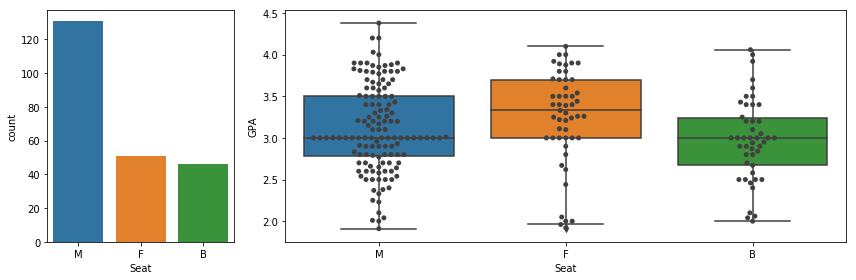

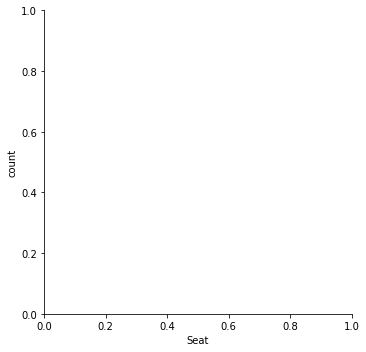

In [36]:
import seaborn as sns
Seat_Enums = { 'M':1, 'F':2, 'B':3 }
fig, axs = plt.subplots(1, 2, tight_layout=True, gridspec_kw = {'width_ratios':[1, 3]})
fig.set_figwidth(12)
df2 = df[df['GPA'] != '*'].copy(deep=True)
df2['GPA'] = df2['GPA'].apply(lambda x: float(x))

_ = sns.boxplot(x="Seat", y="GPA", data=df2, ax=axs[1])
_ = sns.swarmplot(x="Seat", y="GPA", data=df2, color=".25", ax=axs[1])
# sns.violinplot(x="Seat", y="GPA", data=df2, inner=None, ax=axs[0])
_ = sns.catplot(x="Seat", kind='count', data=df2, ax=axs[0])
plt.show()



**Observation**
 - Front
     - Student seating on front tends to do better among all on an average.
     - Also, this set has few students with low (<2.5) GPA.
 - Medium
     - This set showed high variability, ex - this set contains both toppers and bottom most scorer among all set.
 - Back
     - This set has done well in the sense that most of the student has more >3 GPA.
     
**Inference**
 - Seating position of student has effect on grades of student. Though this effect is not very much visible, hence it should be trated as weak effect.